In [44]:
import copy
import datetime

import streamlit as st
import numpy as np
import pandas as pd
import yfinance as yf
import pypfopt
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import plotting

from pypfopt import risk_models
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [16]:
tickers = ['SPY','AAPL','JPM','MSFT']

In [17]:
data =yf.download(tickers, start='2020-01-01', end='2021-12-31')

[*********************100%***********************]  4 of 4 completed


In [18]:
data.head()

Adj Close                                          Close  \
                 AAPL         JPM        MSFT         SPY       AAPL   
Date                                                                   
2020-01-02  73.785919  131.047974  156.924377  312.395050  75.087502   
2020-01-03  73.068565  129.318634  154.970413  310.029510  74.357498   
2020-01-06  73.650803  129.215805  155.370956  311.212280  74.949997   
2020-01-07  73.304413  127.019035  153.954361  310.337250  74.597504   
2020-01-08  74.483604  128.009918  156.406555  311.991211  75.797501   

                                                     High              ...  \
                   JPM        MSFT         SPY       AAPL         JPM  ...   
Date                                                                   ...   
2020-01-02  141.089996  160.619995  324.869995  75.150002  141.100006  ...   
2020-01-03  138.339996  158.619995  322.410004  75.144997  139.229996  ...   
2020-01-06  138.229996  159.029999  323.640015  74.989998  138.270004  ...   
2020-01-07  135.880005  157.580002  322.730011  75.224998  137.860001  ...   
2020-01-08  136.940002  160.089996  324.450012  76.110001  137.580002  ...   

                   Low                   Open                          \
                  MSFT         SPY       AAPL         JPM        MSFT   
Date                                                                    
2020-01-02  158.330002  322.529999  74.059998  139.789993  158.779999   
2020-01-03  158.059998  321.100006  74.287498  137.500000  158.320007   
2020-01-06  156.509995  320.359985  73.447502  136.559998  157.080002   
2020-01-07  157.320007  322.239990  74.959999  137.279999  159.320007   
2020-01-08  157.949997  322.670013  74.290001  135.699997  158.929993   

                           Volume                                
                   SPY       AAPL       JPM      MSFT       SPY  
Date                                                             
2020-01-02  323.540009  135480400  10803700  22622100  59151200  
2020-01-03  321.160004  146322800  10386800  21116200  77709700  
2020-01-06  320.489990  118387200  10259000  20813700  55653900  
2020-01-07  323.019989  108872000  10531300  21634100  40496400  
2020-01-08  322.940002  132079200   9695300  27746500  68296000  

[5 rows x 24 columns]

In [19]:
data2 = data['Adj Close']

In [20]:
mu = expected_returns.mean_historical_return(data2)

In [21]:
cov = risk_models.sample_cov(data2)

In [22]:
ef = EfficientFrontier(mu, cov, weight_bounds=(0,1))

Expected annual return: 52.7%
Annual volatility: 35.0%
Sharpe Ratio: 1.45


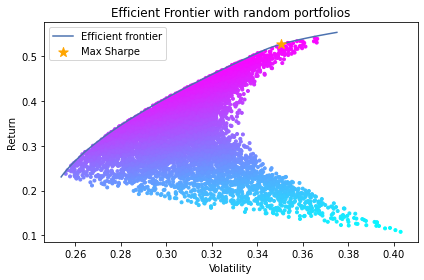

In [23]:
fig, ax = plt.subplots()
ef_max_sharpe = copy.deepcopy(ef)
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False, zorder=10)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance(verbose=True)
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="orange", label="Max Sharpe", zorder=20)

# Generate random portfolios
n_samples = 8000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="cool", zorder=0)

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:>

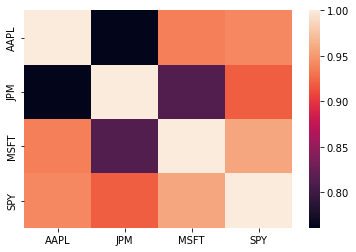

In [24]:
sn.heatmap(data2.corr())

In [50]:
data2.reset_index(inplace=True)
data2

,Date,AAPL,JPM,MSFT,SPY
0,2020-01-02,73.785919,131.047974,156.924377,312.395050
1,2020-01-03,73.068565,129.318634,154.970413,310.029510
2,2020-01-06,73.650803,129.215805,155.370956,311.212280
3,2020-01-07,73.304413,127.019035,153.954361,310.337250
4,2020-01-08,74.483604,128.009918,156.406555,311.991211
...,...,...,...,...,...
499,2021-12-23,175.797409,155.172775,333.223267,467.124695
500,2021-12-27,179.836319,156.060837,340.949280,473.735535
501,2021-12-28,178.799149,156.534454,339.754517,473.348389
502,2021-12-29,178.888916,156.455521,340.451477,473.953918


In [52]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    504 non-null    datetime64[ns]
 1   AAPL    504 non-null    float64       
 2   JPM     504 non-null    float64       
 3   MSFT    504 non-null    float64       
 4   SPY     504 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 19.8 KB


In [42]:
for c in data2.columns:
     a= px.line(data2, x=data2.index, y=data2[c])

In [43]:
a

In [45]:
px.line(data2, x=data2.index,y=data2.columns)

In [49]:
fig = go.Figure()
for c in data2.columns:
     fig.add_trace(go.Scatter(x=data2.index,y=data2[c],mode='lines'))
